In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np


In [2]:
engine = create_engine(
    "mysql+pymysql://root:@localhost:3306/accounting_system_myself"
)


In [3]:
accounts = pd.read_sql("""
SELECT *
FROM accounts
WHERE deleted_at IS NULL
""", engine)


In [4]:
accounts.head()

,id,ranks,account_id,acc_code,acc_type_id,acc_report_type_id,acc_level,acc_debit,acc_credit,acc_balance,userAdd,userEdit,branch_id,status,created_at,updated_at,deleted_at
0,1,1,NaN,1000,1,1,1,0,0,0,1.0,None,1,1,2026-01-13 11:24:00,NaT,None
1,2,2,NaN,2000,1,1,1,0,0,0,1.0,None,1,1,2026-01-13 11:24:00,NaT,None
2,3,3,NaN,3000,1,1,1,0,0,0,1.0,None,1,1,2026-01-13 11:24:00,NaT,None
3,4,4,NaN,4000,1,2,1,0,0,0,1.0,None,1,1,2026-01-13 11:24:00,NaT,None
4,5,5,NaN,5000,1,2,1,0,0,0,1.0,None,1,1,2026-01-13 11:24:00,NaT,None


In [5]:
acc_types = pd.read_sql("""
SELECT at.id, att.locale, att.name
FROM acc_types at
JOIN acc_type_translations att 
    ON at.id = att.acc_type_id
WHERE at.deleted_at IS NULL
  AND att.locale = 'ar'
""", engine)



In [6]:
acc_types.head()

,id,locale,name
0,1,ar,رئيسي
1,2,ar,فرعي


In [7]:
account_translations = pd.read_sql("""
SELECT account_id, locale, name
FROM account_translations
WHERE locale = 'ar'
""", engine)


In [8]:
acc_reports = pd.read_sql("""
SELECT art.id, artt.locale, artt.name
FROM acc_report_types art
JOIN acc_report_type_translations artt 
    ON art.id = artt.acc_report_type_id
WHERE art.deleted_at IS NULL
  AND artt.locale = 'ar'
""", engine)


In [9]:
branches = pd.read_sql("""
SELECT b.id, bt.locale, bt.name AS branch_name, bt.address
FROM branches b
JOIN branch_translations bt ON b.id = bt.branch_id
WHERE b.deleted_at IS NULL 
 AND bt.locale = 'ar'
""", engine)


In [10]:
account_names_ar = account_translations[account_translations["locale"] == "ar"]
acc_types_ar = acc_types[acc_types["locale"] == "ar"]
acc_reports_ar = acc_reports[acc_reports["locale"] == "ar"]
branches_ar = branches[branches["locale"] == "ar"]


In [11]:
df = accounts.merge(
    account_names_ar,
       left_on="id",
    right_on="account_id",
    how="left",
    suffixes=("", "_account_translations")
)


In [12]:
df.tail()

,id,ranks,account_id,acc_code,acc_type_id,acc_report_type_id,acc_level,acc_debit,acc_credit,acc_balance,userAdd,userEdit,branch_id,status,created_at,updated_at,deleted_at,account_id_account_translations,locale,name
11,12,10,5.0,5200,2,2,2,0,0,0,1.0,None,1,1,2026-01-13 11:24:08,NaT,None,12,ar,مصروفات إدارية
12,13,1,NaN,6000,2,5,2,0,0,0,1.0,None,1,1,2026-01-13 12:54:24,NaT,None,13,ar,المشتريات
13,14,2,NaN,1300,2,1,3,0,0,0,1.0,None,1,1,2026-01-13 12:54:24,2026-01-13 09:55:29,None,14,ar,ضريبة
14,15,3,NaN,2500,2,2,5,0,0,0,1.0,None,1,1,2026-01-13 12:54:24,2026-01-13 09:56:03,None,15,ar,مبيعات
15,16,3,2.0,1500,2,2,34,0,0,0,NaN,None,1,1,2026-01-13 10:23:46,2026-01-13 10:23:46,None,16,ar,المدينة


In [13]:
df = df.merge(
    acc_types_ar,
    left_on="acc_type_id",
    right_on="id",
    how="left",
    suffixes=("", "_acc_type")
)


In [14]:
df.head()

,id,ranks,account_id,acc_code,acc_type_id,acc_report_type_id,acc_level,acc_debit,acc_credit,acc_balance,...,status,created_at,updated_at,deleted_at,account_id_account_translations,locale,name,id_acc_type,locale_acc_type,name_acc_type
0,1,1,NaN,1000,1,1,1,0,0,0,...,1,2026-01-13 11:24:00,NaT,None,1,ar,الأصول,1,ar,رئيسي
1,2,2,NaN,2000,1,1,1,0,0,0,...,1,2026-01-13 11:24:00,NaT,None,2,ar,الخصوم,1,ar,رئيسي
2,3,3,NaN,3000,1,1,1,0,0,0,...,1,2026-01-13 11:24:00,NaT,None,3,ar,حقوق الملكية,1,ar,رئيسي
3,4,4,NaN,4000,1,2,1,0,0,0,...,1,2026-01-13 11:24:00,NaT,None,4,ar,الإيرادات,1,ar,رئيسي
4,5,5,NaN,5000,1,2,1,0,0,0,...,1,2026-01-13 11:24:00,NaT,None,5,ar,المصروفات,1,ar,رئيسي


In [15]:
df = df.merge(
    acc_reports_ar,
    left_on="acc_report_type_id",
    right_on="id",
    how="left",
    suffixes=("", "_report")
)


In [16]:
df.head()

,id,ranks,account_id,acc_code,acc_type_id,acc_report_type_id,acc_level,acc_debit,acc_credit,acc_balance,...,deleted_at,account_id_account_translations,locale,name,id_acc_type,locale_acc_type,name_acc_type,id_report,locale_report,name_report
0,1,1,NaN,1000,1,1,1,0,0,0,...,None,1,ar,الأصول,1,ar,رئيسي,1.0,ar,الميزانية العمومية
1,2,2,NaN,2000,1,1,1,0,0,0,...,None,2,ar,الخصوم,1,ar,رئيسي,1.0,ar,الميزانية العمومية
2,3,3,NaN,3000,1,1,1,0,0,0,...,None,3,ar,حقوق الملكية,1,ar,رئيسي,1.0,ar,الميزانية العمومية
3,4,4,NaN,4000,1,2,1,0,0,0,...,None,4,ar,الإيرادات,1,ar,رئيسي,2.0,ar,الارباح و خسائر
4,5,5,NaN,5000,1,2,1,0,0,0,...,None,5,ar,المصروفات,1,ar,رئيسي,2.0,ar,الارباح و خسائر


In [17]:
df = df.merge(
    branches_ar,
    left_on="branch_id",
    right_on="id",
    how="left",
    suffixes=("", "_branch")
)


In [18]:
df.head()

,id,ranks,account_id,acc_code,acc_type_id,acc_report_type_id,acc_level,acc_debit,acc_credit,acc_balance,...,id_acc_type,locale_acc_type,name_acc_type,id_report,locale_report,name_report,id_branch,locale_branch,branch_name,address
0,1,1,NaN,1000,1,1,1,0,0,0,...,1,ar,رئيسي,1.0,ar,الميزانية العمومية,1,ar,نظام محاسبي,صنعاء
1,2,2,NaN,2000,1,1,1,0,0,0,...,1,ar,رئيسي,1.0,ar,الميزانية العمومية,1,ar,نظام محاسبي,صنعاء
2,3,3,NaN,3000,1,1,1,0,0,0,...,1,ar,رئيسي,1.0,ar,الميزانية العمومية,1,ar,نظام محاسبي,صنعاء
3,4,4,NaN,4000,1,2,1,0,0,0,...,1,ar,رئيسي,2.0,ar,الارباح و خسائر,1,ar,نظام محاسبي,صنعاء
4,5,5,NaN,5000,1,2,1,0,0,0,...,1,ar,رئيسي,2.0,ar,الارباح و خسائر,1,ar,نظام محاسبي,صنعاء


In [19]:
pip install pandas plotly

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import plotly.graph_objects as go

# ترتيب البيانات
df = df.sort_values("ranks").reset_index(drop=True)

parents = []
last_parent_by_level = {}

for _, row in df.iterrows():
    level = row["ranks"]

    if level == 1:
        parents.append("")  # Root
        last_parent_by_level[level] = str(row["id"])
    else:
        parent_id = last_parent_by_level.get(level - 1, "")
        parents.append(parent_id)
        last_parent_by_level[level] = str(row["id"])

df["parent"] = parents


In [21]:
tree_df = pd.DataFrame({
    "id": df["id"].astype(str),
    "label": df["name"],
    "parent": df["account_id"]
})


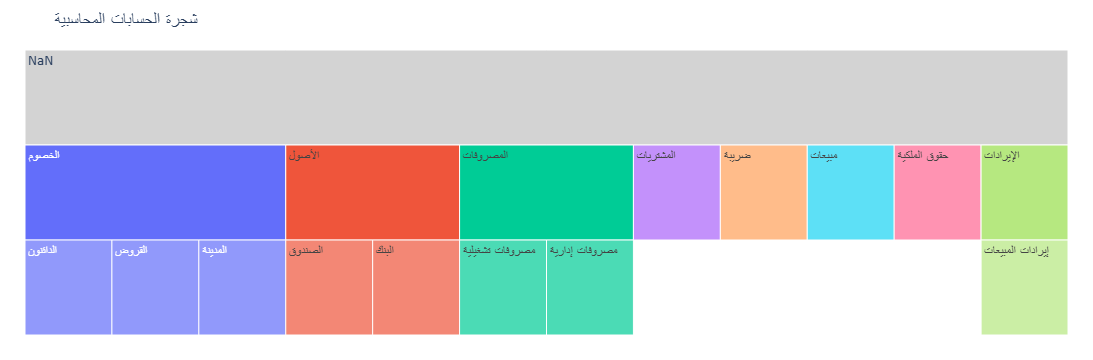

In [22]:
fig = go.Figure(go.Icicle(
    ids=tree_df["id"],
    labels=tree_df["label"],
    parents=tree_df["parent"],
    root_color="lightgrey",
    tiling=dict(orientation="v")
))

fig.update_layout(
    title="شجرة الحسابات المحاسبية",
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.show()


In [23]:
journals = pd.read_sql("""
SELECT *
FROM journals
WHERE deleted_at IS NULL
""", engine)

In [24]:
journals.head()

,id,journal_number,date,note,post,journal_type_id,operation_type_id,debit,credit,balance,user_id,branch_id,created_at,updated_at,deleted_at
0,1,11,2026-01-13,سند قبض نقدي من المبيعات,1,1,3,100000,100000,0,1,1,2026-01-13 11:42:29,2026-01-13 09:22:51,None
1,2,12,2026-01-13,سند صرف مصروفات إدارية,1,1,2,20000,20000,0,1,1,2026-01-13 11:42:54,2026-01-13 08:50:10,None
2,5,15,2026-01-13,سند,1,1,2,5000,5000,0,1,1,2026-01-13 08:54:58,2026-01-13 08:54:58,None
3,7,17,2026-01-13,فاتورة مبيعات رقم: 16,1,1,6,15000,15000,0,1,1,2026-01-13 10:28:54,2026-01-13 10:28:54,None
4,8,18,2026-01-14,يسي,1,1,1,1500,1500,0,1,1,2026-01-14 16:16:20,2026-01-14 16:16:20,None


In [25]:
journal_details = pd.read_sql("""
SELECT *
FROM journal_details
WHERE deleted_at IS NULL
""", engine)

In [26]:
journal_details.head()

,id,journal_id,account_id,acc_debit,acc_credit,note,currency_id,created_at,updated_at,deleted_at
0,3,2,12,20000,0,مصروفات إدارية,1,2026-01-13 11:42:54,2026-01-13 08:50:10,None
1,4,2,6,0,20000,صرف نقدي من الصندوق,1,2026-01-13 11:42:54,2026-01-13 08:50:10,None
2,9,5,11,5000,0,سند,1,2026-01-13 08:54:58,2026-01-13 08:54:58,None
3,10,5,6,0,5000,سند,1,2026-01-13 08:54:58,2026-01-13 08:54:58,None
4,11,1,10,0,100000,سند قبض نقدي من المبيعات,1,2026-01-13 09:22:51,2026-01-13 09:22:51,None


In [28]:
result = journal_details.groupby("journal_id", as_index=False).agg({
    "acc_debit": "sum",
    "acc_credit": "sum"
})


In [29]:
result

,journal_id,acc_debit,acc_credit
0,1,100000,100000
1,2,20000,20000
2,5,5000,5000
3,7,15000,15000
4,8,1500,1500
5,20,500,0


In [36]:
journal_types = pd.read_sql("""
SELECT jt.id,jtt.journal_type_id, jtt.locale, jtt.name
FROM journal_types jt
JOIN journal_type_translations jtt 
    ON jt.id = jtt.journal_type_id
WHERE jt.deleted_at IS NULL
  AND jtt.locale = 'ar'
""", engine)


In [37]:
journal_types

,id,journal_type_id,locale,name
0,1,1,ar,عام
1,2,2,ar,معلق\r\n
2,3,3,ar,عكسي


In [40]:
operation_types = pd.read_sql("""
SELECT ot.id,ott.operation_type_id, ott.locale, ott.name
FROM operation_types ot
JOIN operation_type_translations ott 
    ON ot.id = ott.operation_type_id
WHERE ot.deleted_at IS NULL
  AND ott.locale = 'ar'
""", engine)

In [41]:
operation_types

,id,operation_type_id,locale,name
0,1,1,ar,قيد يومية
1,2,2,ar,سند صرف
2,3,3,ar,سند قبض
3,4,4,ar,فاتورة مشتريات
4,5,5,ar,فاتورة مردود مشتريات
5,6,6,ar,فاتورة مبيعات
6,7,7,ar,فاتورة مردود مبيعات


In [38]:
journal = journals.merge(
    journal_types,
    left_on="journal_type_id",
    right_on="journal_type_id",
    how="left",
    suffixes=("", "_journal")
)

In [39]:
journal

,id,journal_number,date,note,post,journal_type_id,operation_type_id,debit,credit,balance,user_id,branch_id,created_at,updated_at,deleted_at,id_journal,locale,name
0,1,11,2026-01-13,سند قبض نقدي من المبيعات,1,1,3,100000,100000,0,1,1,2026-01-13 11:42:29,2026-01-13 09:22:51,None,1,ar,عام
1,2,12,2026-01-13,سند صرف مصروفات إدارية,1,1,2,20000,20000,0,1,1,2026-01-13 11:42:54,2026-01-13 08:50:10,None,1,ar,عام
2,5,15,2026-01-13,سند,1,1,2,5000,5000,0,1,1,2026-01-13 08:54:58,2026-01-13 08:54:58,None,1,ar,عام
3,7,17,2026-01-13,فاتورة مبيعات رقم: 16,1,1,6,15000,15000,0,1,1,2026-01-13 10:28:54,2026-01-13 10:28:54,None,1,ar,عام
4,8,18,2026-01-14,يسي,1,1,1,1500,1500,0,1,1,2026-01-14 16:16:20,2026-01-14 16:16:20,None,1,ar,عام
5,20,120,2026-01-15,dfdf,0,2,1,500,0,500,1,1,2026-01-15 09:48:37,2026-01-15 09:48:37,None,2,ar,معلق\r\n


In [44]:
journal = journal.merge(
    operation_types,
    left_on="operation_type_id",
    right_on="operation_type_id",
    how="left",
    suffixes=("", "_operation_type")
)

In [45]:
journal[['journal_number','date','post','name','name_operation_type','debit','credit','balance']]

,journal_number,date,post,name,name_operation_type,debit,credit,balance
0,11,2026-01-13,1,عام,سند قبض,100000,100000,0
1,12,2026-01-13,1,عام,سند صرف,20000,20000,0
2,15,2026-01-13,1,عام,سند صرف,5000,5000,0
3,17,2026-01-13,1,عام,فاتورة مبيعات,15000,15000,0
4,18,2026-01-14,1,عام,قيد يومية,1500,1500,0
5,120,2026-01-15,0,معلق\r\n,قيد يومية,500,0,500


In [55]:
exchange_bond = pd.read_sql("""
SELECT *
FROM bonds bo
JOIN bond_details bon 
    ON bo.id = bon.bond_id
WHERE bo.deleted_at IS NULL
  AND bo.bond_type_id = 2
""", engine)

In [60]:
funds = pd.read_sql("""
SELECT fu.id,fun.fund_id, fun.locale, fun.name
FROM funds fu
JOIN fund_translations fun
    ON fu.id = fun.fund_id
WHERE fu.deleted_at IS NULL
  AND fun.locale = 'ar'
""", engine)

In [61]:
funds

,id,fund_id,locale,name
0,1,1,ar,الصندوق الرئيسي
1,2,2,ar,صندوق الطوارئ


In [62]:
banks = pd.read_sql("""
SELECT ba.id,ban.bank_id, ban.locale, ban.name
FROM banks ba
JOIN bank_translations ban
    ON ba.id = ban.bank_id
WHERE ba.deleted_at IS NULL
  AND ban.locale = 'ar'
""", engine)

In [63]:
banks

,id,bank_id,locale,name
0,1,1,ar,البنك الرئيسي
1,2,2,ar,بنك التوفير


In [73]:
exchange_bonds = exchange_bond.merge(
    funds,
    left_on="fund_id",
    right_on="fund_id",
    how="left",
    suffixes=("", "_fund")
)

In [79]:
exchange_bonds["bank_id"] = exchange_bonds["bank_id"].fillna(0).infer_objects()

exchange = exchange_bonds.merge(
    banks,
    left_on="bank_id",
    right_on="bank_id",
    how="left",
    suffixes=("", "_bank")
)


In [84]:
exchange[['check_no','date','post','name','name_bank','amount','note']]

,check_no,date,post,name,name_bank,amount,amount,note,note
0,122,2026-01-13 00:00:00,1,الصندوق الرئيسي,NaN,20500,20000,سند صرف مصروفات إدارية,صرف مصروفات إدارية
1,123,2026-01-13 11:54:58,1,الصندوق الرئيسي,NaN,5000,5000,سند,None
2,122,2026-01-13 00:00:00,1,الصندوق الرئيسي,NaN,20500,500,سند صرف مصروفات إدارية,None


In [85]:
receive_bond = pd.read_sql("""
SELECT *
FROM bonds bo
JOIN bond_details bon 
    ON bo.id = bon.bond_id
WHERE bo.deleted_at IS NULL
  AND bo.bond_type_id = 1
""", engine)

In [86]:
receive_bond = receive_bond.merge(
    funds,
    left_on="fund_id",
    right_on="fund_id",
    how="left",
    suffixes=("", "_fund")
)

In [88]:
receive_bond["bank_id"] = receive_bond["bank_id"].fillna(0).infer_objects()

receive = receive_bond.merge(
    banks,
    left_on="bank_id",
    right_on="bank_id",
    how="left",
    suffixes=("", "_bank")
)

In [89]:
receive[['check_no','date','post','name','name_bank','amount','note']]

,check_no,date,post,name,name_bank,amount,amount,note,note
0,111,2026-01-13 12:24:58,1,الصندوق الرئيسي,NaN,100000,100000,سند قبض نقدي من المبيعات,قبض قيمة مبيعات نقدية
